In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import PSP


In [2]:
# Load fake date used in first example

xy = np.load(open('PSP_DemoData1', 'rb'))
xy.shape

(180000, 2)

In [3]:
# Select subset for initial plots

maxpoints = 3000
x = xy[:maxpoints,0]
y = xy[:maxpoints,1]

x = x.reshape((-1,len(x)))
y = y.reshape((-1,len(y)))
   

In [4]:
# calculate Euclidean distance and similarity matrix
xdif = x - x.T
ydif = y - y.T
dist = np.sqrt(xdif**2 + ydif**2)

simmat = 1/(1 + dist)
 

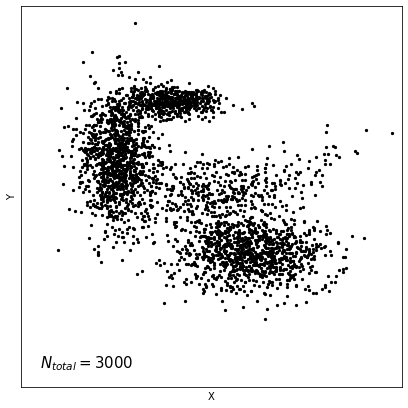

In [5]:
# Make plot for Fig. 2

npoints = simmat.shape[0]
fig = plt.figure(figsize=(7,7))

s = 5
plt.scatter(x, y, s=s, c='k')
plt.annotate('$N_{total} = $%d' % npoints , (-9,-9), fontsize=15)

plt.xlim([-10,10])
plt.ylim([-10,10])

axes=plt.gca()
axes.set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Fig2.pdf')
plt.show()


In [6]:
# Set threshold and apply PSP algorithm

th = 0.301

cm = PSP.simClassMap(xy[0:maxpoints], simmat, th, verbose=True)

Data shape:  (3000, 2)
Matrix shape:  (3000, 3000)
Similarity threshold used:  0.301
Finding Class 1
821 members, 2179 unclassified

Finding Class 2
718 members, 1461 unclassified

Finding Class 3
499 members, 962 unclassified

Finding Class 4
272 members, 690 unclassified

Finding Class 5
159 members, 531 unclassified

Finding Class 6
152 members, 379 unclassified

Finding Class 7
100 members, 279 unclassified

Finding Class 8
95 members, 184 unclassified

Finding Class 9
94 members, 90 unclassified

Finding Class 10
16 members, 74 unclassified

Finding Class 11
16 members, 58 unclassified

Finding Class 12
13 members, 45 unclassified

Finding Class 13
13 members, 32 unclassified

Finding Class 14
12 members, 20 unclassified

Finding Class 15
6 members, 14 unclassified

Finding Class 16
4 members, 10 unclassified

Finding Class 17
3 members, 7 unclassified

Finding Class 18
2 members, 5 unclassified

Finding Class 19
2 members, 3 unclassified

Finding Class 20
1 members, 2 unclassifie

In [7]:
# Print summary data

cm.print(maxlines=50)

Class Prototype Count  Fraction      Totals
   1     1433    821    0.274      821    0.274
   2     1666    718    0.239     1539    0.513
   3     2010    499    0.166     2038    0.679
   4     2349    272    0.091     2310    0.770
   5     1185    159    0.053     2469    0.823
   6      196    152    0.051     2621    0.874
   7      517    100    0.033     2721    0.907
   8     1245     95    0.032     2816    0.939
   9      123     94    0.031     2910    0.970
  10      448     16    0.005     2926    0.975
  11      497     16    0.005     2942    0.981
  12     1132     13    0.004     2955    0.985
  13     2181     13    0.004     2968    0.989
  14      381     12    0.004     2980    0.993
  15      648      6    0.002     2986    0.995
  16      891      4    0.001     2990    0.997
  17     1863      3    0.001     2993    0.998
  18      489      2    0.001     2995    0.998
  19     2031      2    0.001     2997    0.999
  20     2092      1    0.000     2998    0.

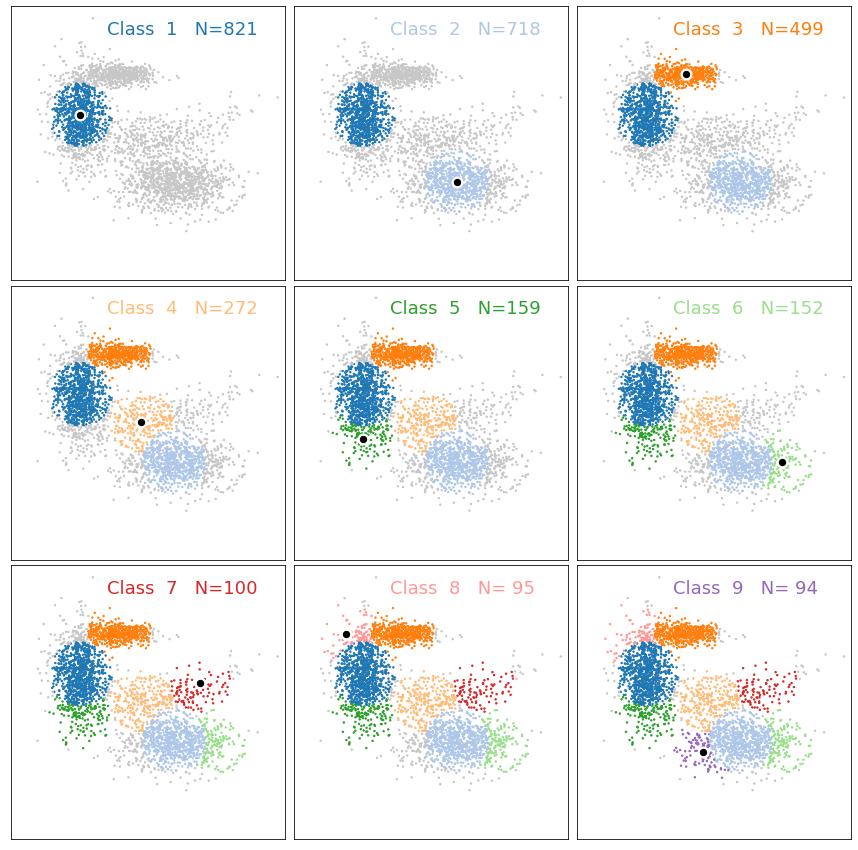

In [8]:
# Make Fig. 3

s = 2  # point size in scatterplots

cmap = matplotlib.cm.get_cmap('tab20')  # choose color table

xyp = cm.data[cm.prototypes]  # get coordinates of cluster prototypes

plt.figure(figsize=(12,13))

for i in range(9):
    
    plt.subplot(3,3,i+1)
    
    cA = np.copy(cm.map)
    cA[cA > (i+1)] = 16
    plt.scatter(x, y, s=s, c=cA-0.5, cmap=cmap, vmin=0, vmax=20)
    
    plt.scatter(xyp[i, 0], xyp[i, 1], s=120, c='w')
    plt.scatter(xyp[i, 0], xyp[i, 1], s=40, c='k')
   
    rgba = cmap((i+0.5)/20)

    plt.annotate('Class %2d   N=%3d' % ((i+1), len(cm.members[i])), (-3,8), color=rgba, fontsize=18)
    axes=plt.gca()
    axes.set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-10,10])
    plt.ylim([-10,10])

plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.90, wspace=0.01, hspace=0.02)
plt.savefig("Fig3.pdf", dpi=200)
plt.show()
    
    

In [9]:
# Perform operations required for Fig. 4

import copy

print('original')
cm.print()
print()

cm1 = copy.deepcopy(cm)
cm1.reassign()

print('reassigned')
cm1.print()
print()

cm2 = copy.deepcopy(cm1)
cm2.sort()
print('sorted')
cm2.print()
print()

ntrunc = 10
cm3 = copy.deepcopy(cm2)
cm3.truncate(ntrunc)
print('truncated')

cm3.print()


original
Class Prototype Count  Fraction      Totals
   1     1433    821    0.274      821    0.274
   2     1666    718    0.239     1539    0.513
   3     2010    499    0.166     2038    0.679
   4     2349    272    0.091     2310    0.770
   5     1185    159    0.053     2469    0.823
   6      196    152    0.051     2621    0.874
   7      517    100    0.033     2721    0.907
   8     1245     95    0.032     2816    0.939
   9      123     94    0.031     2910    0.970
  10      448     16    0.005     2926    0.975
  11      497     16    0.005     2942    0.981
  12     1132     13    0.004     2955    0.985
  13     2181     13    0.004     2968    0.989
  14      381     12    0.004     2980    0.993
  15      648      6    0.002     2986    0.995
  16      891      4    0.001     2990    0.997
  17     1863      3    0.001     2993    0.998
  18      489      2    0.001     2995    0.998
  19     2031      2    0.001     2997    0.999
  20     2092      1    0.000     2

In [10]:
# Apply previously found classification to larger dataset 

xyp = cm3.data[cm3.prototypes]
xp = xyp[:,0]
yp = xyp[:,1]

xp = xp.reshape((-1,len(xp)))
yp = yp.reshape((-1,len(yp)))

maxpoints1 = 30000      # 10x larger than original subset
x1 = xy[:maxpoints1,0]
y1 = xy[:maxpoints1,1]

x1 = x1.reshape((-1,len(x1)))
y1 = y1.reshape((-1,len(y1)))

xdif = xp - x1.T
ydif = yp - y1.T
dist = np.sqrt(xdif**2 + ydif**2)   # Euclidean distance

simmat1 = 1/(1 + dist)  # Non-square similarity matrix (npoints x nprototypes)

simmat1.shape

cm3.augment(xy[:maxpoints1,:], simmat1)


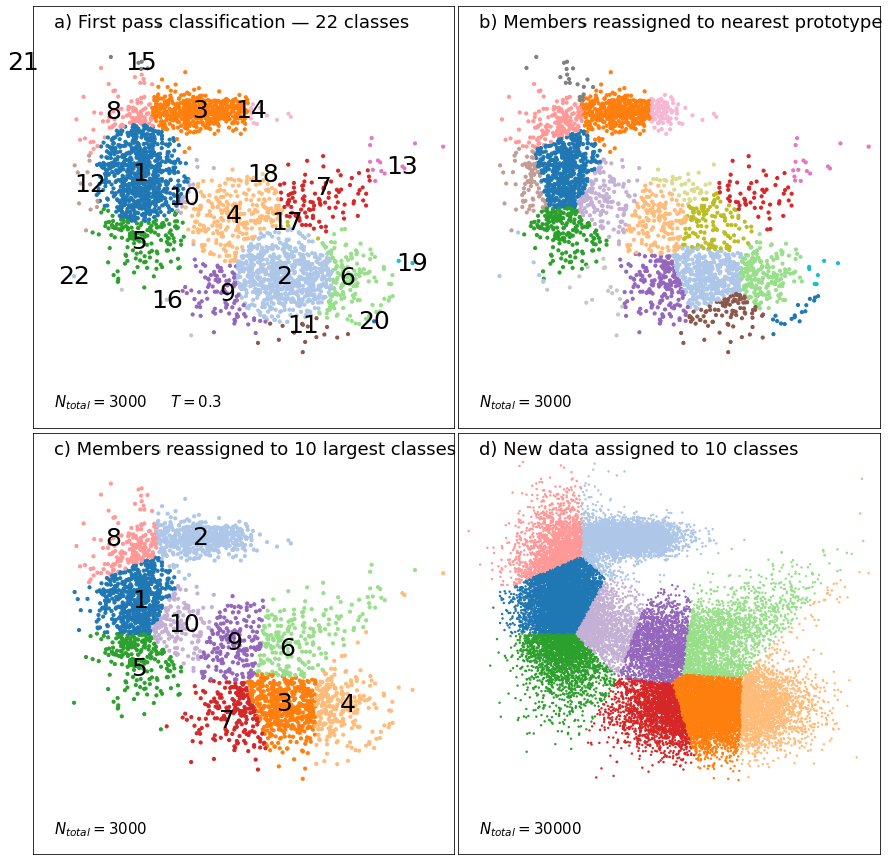

In [11]:
size = 10
nclasses = np.max(cm.map)

plt.figure(figsize=(12,13.25))

plt.subplot(221)

cA = np.copy(cm.map) % 20
plt.scatter(x, y, s=size, c=cA-0.5, cmap=cmap, vmin=0, vmax=20)
plt.annotate('a) First pass classification — %d classes' % nclasses , (-9,9), fontsize=18)
plt.annotate('$N_{total} = $%d     $T = $%.1f' % (npoints, th) , (-9,-9), fontsize=15)

xp1 = cm.data[cm.prototypes][:, 0]
yp1 = cm.data[cm.prototypes][:, 1]
for j in range(len(xp1)):
    plt.text( xp1[j],yp1[j], str(j+1), fontsize=25, ha='center', va='center')
               

axes=plt.gca()
axes.set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.xlim([-10,10])
plt.ylim([-10,10])
#plt.show()

plt.subplot(222)


cA = np.copy(cm1.map) % 20
plt.scatter(x, y, s=size, c=cA-0.5, cmap=cmap, vmin=0, vmax=20)
plt.annotate('b) Members reassigned to nearest prototype', (-9,9), fontsize=18)
plt.annotate('$N_{total} = $%d' % npoints , (-9,-9), fontsize=15)

axes=plt.gca()
axes.set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.xlim([-10,10])
plt.ylim([-10,10])

plt.subplot(223)

cA = np.copy(cm3.map) % 20
plt.scatter(x, y, s=size, c=cA-0.5, cmap=cmap, vmin=0, vmax=20)
plt.annotate('c) Members reassigned to %d largest classes' % ntrunc, (-9,9), fontsize=18)
plt.annotate('$N_{total} = $%d' % (npoints) , (-9,-9), fontsize=15)

xp1 = cm3.data[cm3.prototypes][:, 0]
yp1 = cm3.data[cm3.prototypes][:, 1]
for j in range(len(xp1)):
    plt.text( xp1[j],yp1[j], str(j+1), fontsize=25, ha='center', va='center')


axes=plt.gca()
axes.set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.xlim([-10,10])
plt.ylim([-10,10])

plt.subplot(224)

cA = cm3.map2 % 20
plt.scatter(x1, y1, s=2, c=cA-0.5, cmap=cmap, vmin=0, vmax=20)
plt.annotate('d) New data assigned to 10 classes', (-9,9), fontsize=18)
plt.annotate('$N_{total} = $%d' % (x1.shape[1]) , (-9,-9), fontsize=15)

axes=plt.gca()
axes.set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.xlim([-10,10])
plt.ylim([-10,10])


plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.90, wspace=0.01, hspace=0.01)
plt.savefig("Fig4.pdf")
plt.show()
